# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Imporing Dataset

In [2]:
df = pd.read_csv('superstore_final_dataset.csv', encoding='latin1')

# Reading Dataset

In [3]:
df.head(3)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


# Shape of the Dataset

In [4]:
print('Dataset contains', df.shape[0], 'rows and', df.shape[1], 'columns')

Dataset contains 9800 rows and 18 columns


# Checking column names

In [5]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

# Info/Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Correcting Datatype

In [7]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'],format = '%d/%m/%Y')
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format = '%d/%m/%Y')

# Again Checking Datatype corrected or not

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

# 5 Point summary

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row_ID,9800.0,4900.5,1.0,2450.75,4900.5,7350.25,9800.0,2829.160653
Order_Date,9800,2017-05-01 05:13:51.673469440,2015-01-03 00:00:00,2016-05-24 00:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00,NaN
Ship_Date,9800,2017-05-05 04:17:52.653061120,2015-01-07 00:00:00,2016-05-27 18:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00,NaN
Postal_Code,9789.0,55273.322403,1040.0,23223.0,58103.0,90008.0,99301.0,32041.223413
Sales,9800.0,230.769059,0.444,17.248,54.49,210.605,22638.48,626.651875


In [10]:
df.describe(include  = 'object').T

,count,unique,top,freq
Order_ID,9800,4922,CA-2018-100111,14
Ship_Mode,9800,4,Standard Class,5859
Customer_ID,9800,793,WB-21850,35
Customer_Name,9800,793,William Brown,35
Segment,9800,3,Consumer,5101
Country,9800,1,United States,9800
City,9800,529,New York City,891
State,9800,49,California,1946
Region,9800,4,West,3140
Product_ID,9800,1861,OFF-PA-10001970,19


# Check for Zero or Negative Sales

In [11]:
print("Zero Sales Rows:", (df['Sales'] == 0).sum())
print("Negative Sales Rows:", (df['Sales'] < 0).sum())

Zero Sales Rows: 0
Negative Sales Rows: 0


# Checking missing values

In [12]:
df.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

# Checking the percentage of missing values to decide whether to drop or impute them.

In [13]:
df.isna().sum()/df.shape[0] * 100

Row_ID           0.000000
Order_ID         0.000000
Order_Date       0.000000
Ship_Date        0.000000
Ship_Mode        0.000000
Customer_ID      0.000000
Customer_Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal_Code      0.112245
Region           0.000000
Product_ID       0.000000
Category         0.000000
Sub_Category     0.000000
Product_Name     0.000000
Sales            0.000000
dtype: float64

# Dropping missing values

In [14]:
df.dropna(inplace = True)

# Again Checking null values are dropped or not

In [15]:
df.isna().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

# Checking duplicates

In [16]:
df.duplicated().sum()

0

# Visualizations


# Visualize Original Sales Distribution

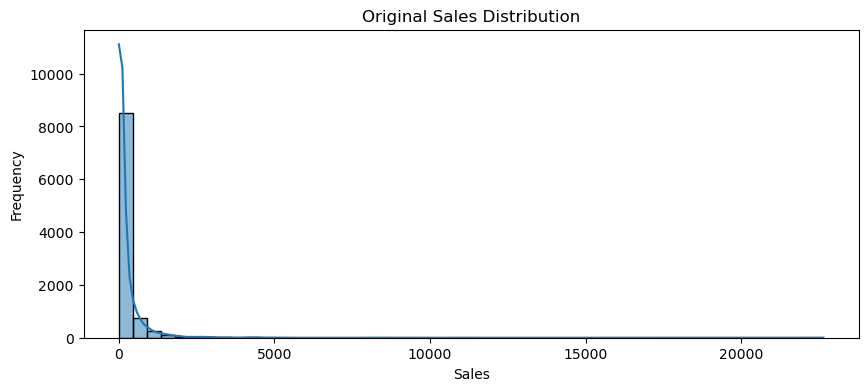

In [17]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Original Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot to Visualize Outliers

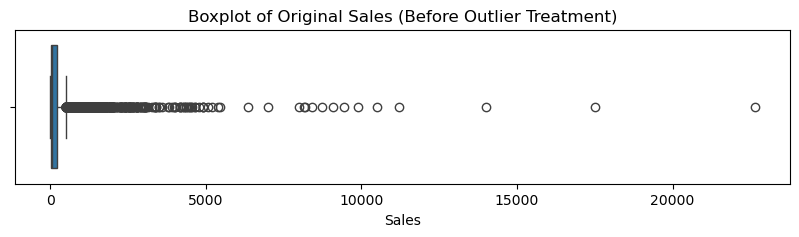

In [18]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Original Sales (Before Outlier Treatment)')
plt.show()

# Detect Outliers Using IQR

In [19]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show number of outliers

In [20]:

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(f"Number of outliers in 'Sales': {len(outliers)}")

Number of outliers in 'Sales': 1141



# Step 5: Treat Outliers (Capping)

In [21]:
df['Sales_Capped'] = df['Sales'].clip(lower=lower_bound, upper=upper_bound)

# Visualize Sales Distribution After Outlier Treatment

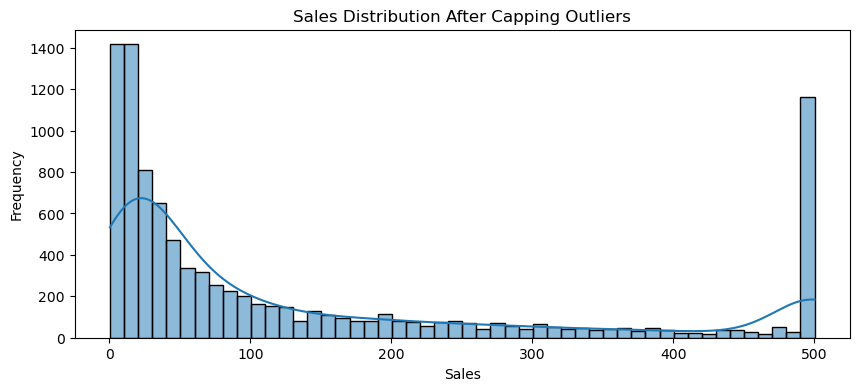

In [22]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Sales_Capped'], bins=50, kde=True)
plt.title('Sales Distribution After Capping Outliers')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot After Outlier Treatment

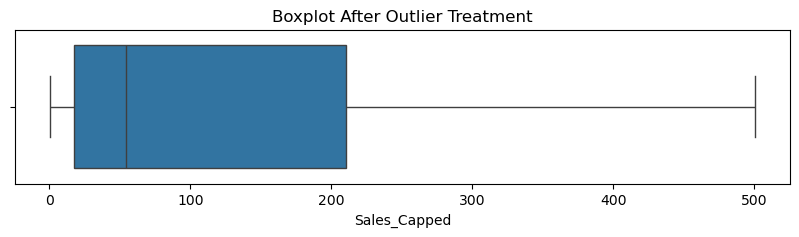

In [23]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Sales_Capped'])
plt.title('Boxplot After Outlier Treatment')
plt.show()

# KDE Plot to Compare Original vs Capped Sales

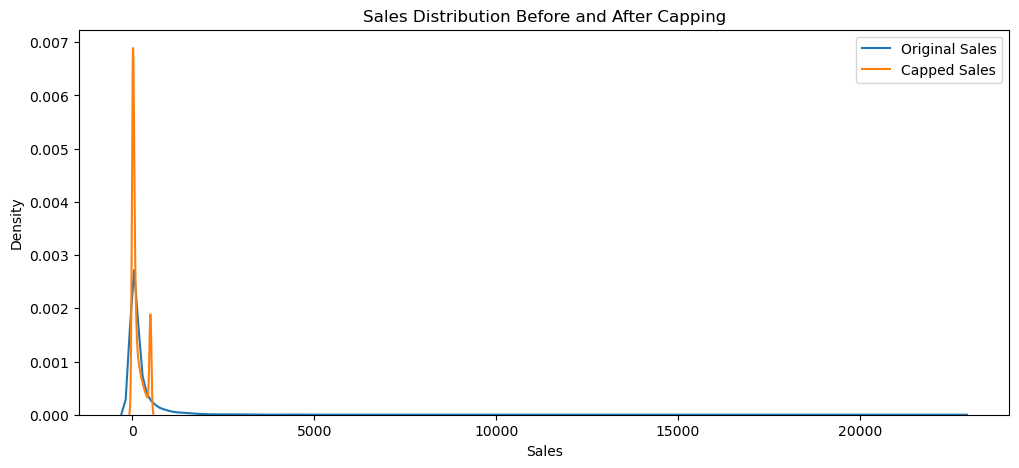

In [26]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df['Sales'], label='Original Sales')
sns.kdeplot(df['Sales_Capped'], label='Capped Sales')
plt.title('Sales Distribution Before and After Capping')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()

# Top 10 Products by Sales

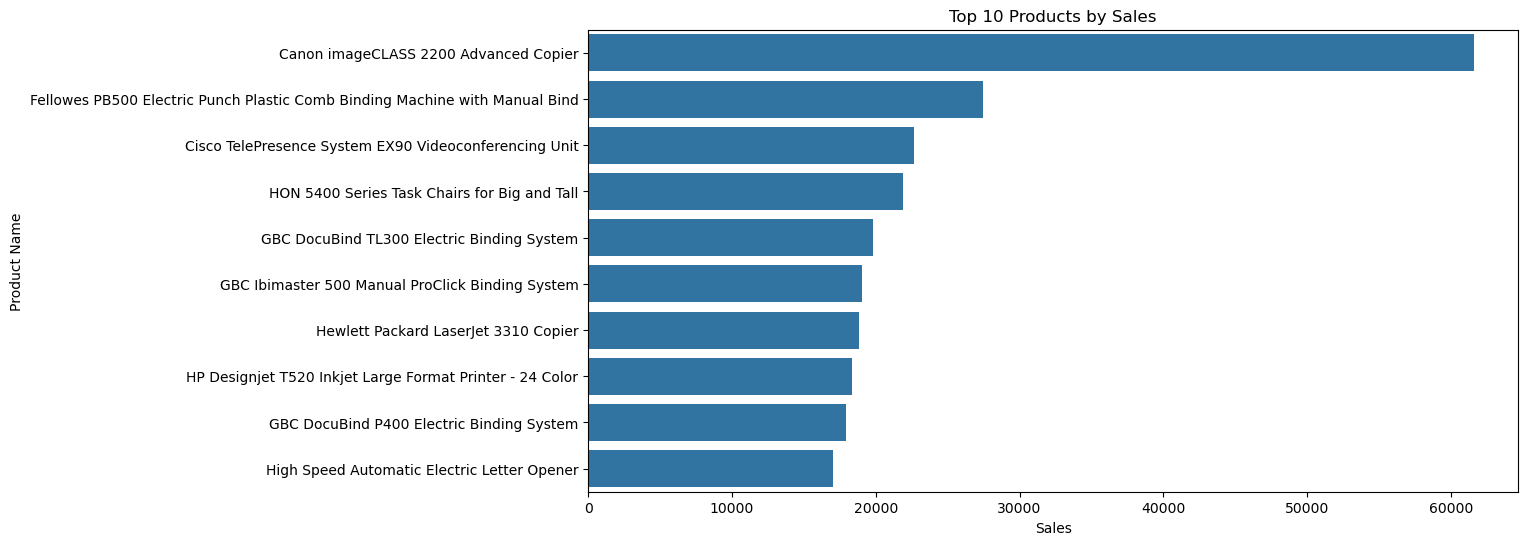

In [27]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, )
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

#  Sales by Segment

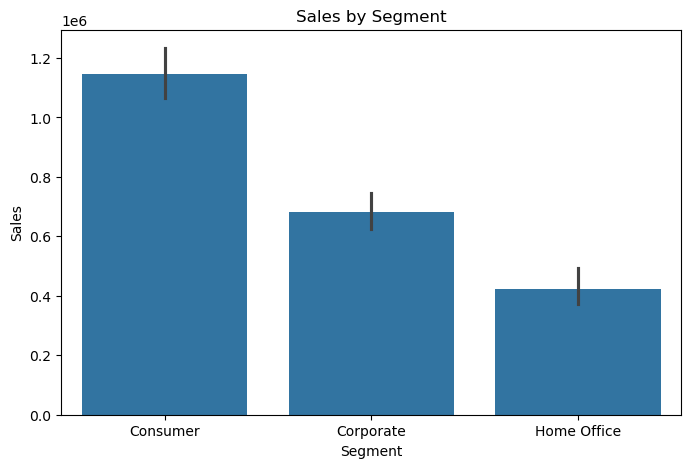

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Segment', y='Sales', estimator=sum, )
plt.title('Sales by Segment')
plt.show()

# Sales by Region vs Category

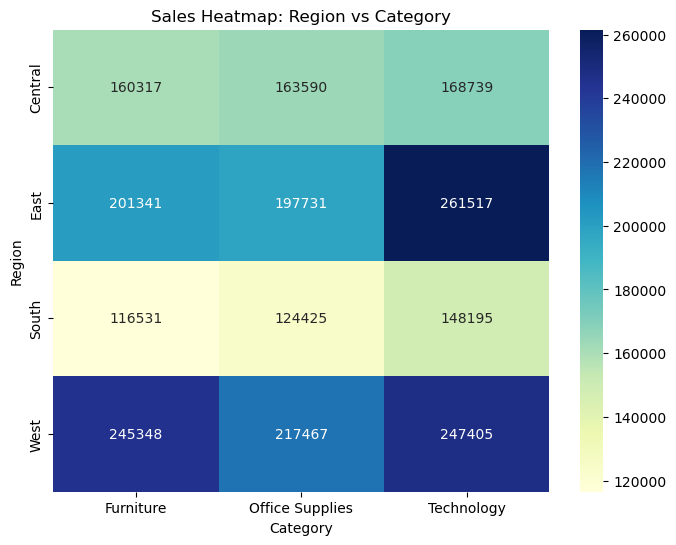

In [29]:
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sales Heatmap: Region vs Category')
plt.show()

# Monthly Sales Trend

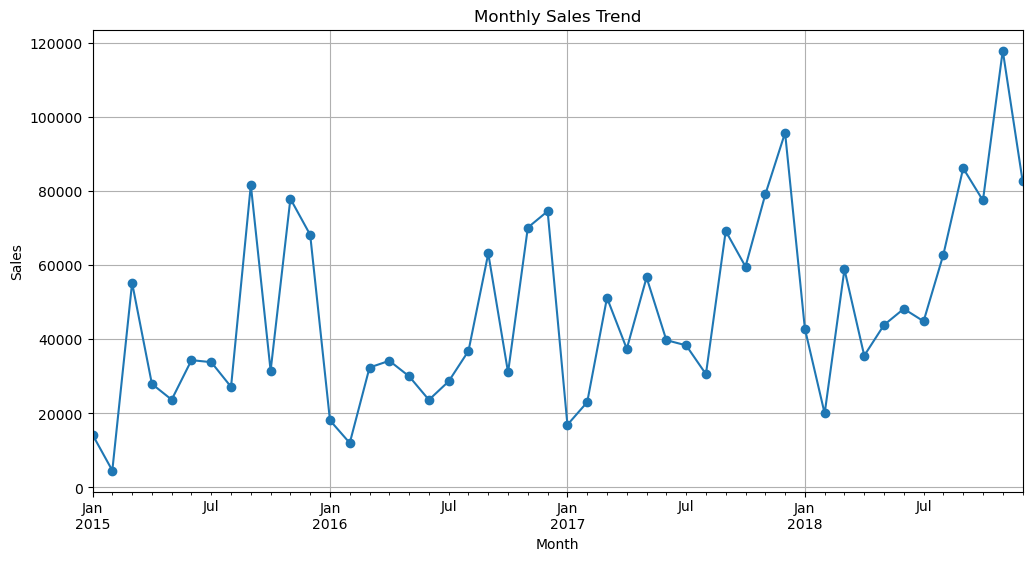

In [30]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Top 10 Cities by Sales:

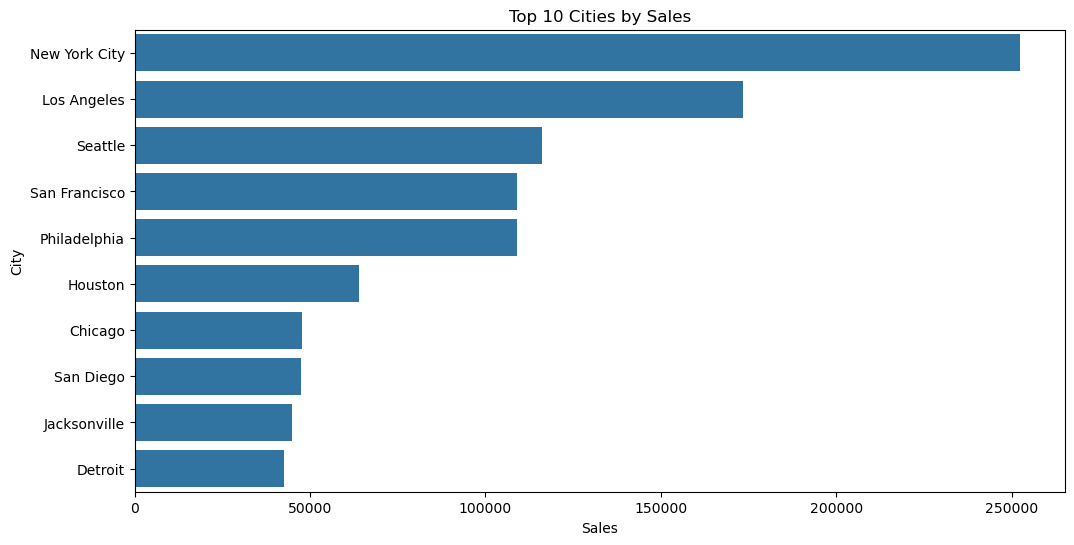

In [31]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

# Sales by Ship Mode:

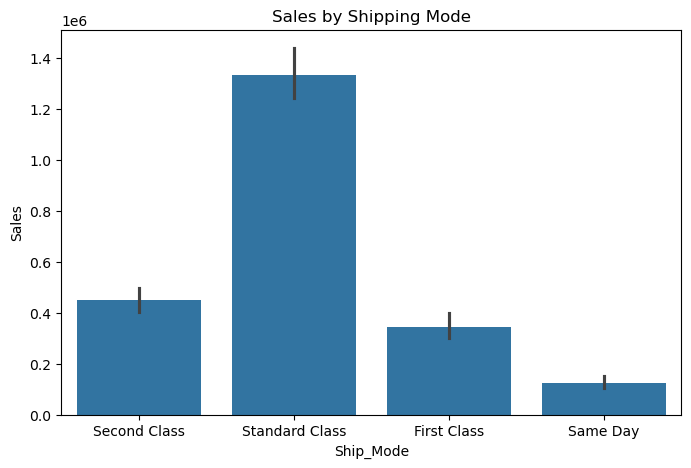

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Ship_Mode', y='Sales', estimator=sum)
plt.title('Sales by Shipping Mode')
plt.show()

# Sales Contribution by Category/Sub-Category (Pie Chart)

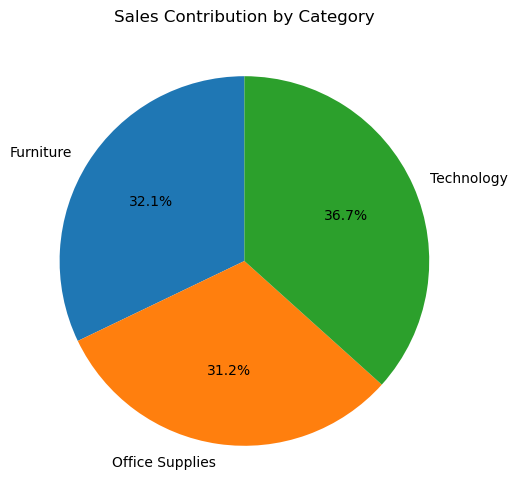

In [33]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
category_sales.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sales Contribution by Category')
plt.ylabel('')
plt.show()